### Metrics

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

Let's download a database

In [54]:
col_names = ['num_preg', 'glucose', 'bp', 'thickness', 'insulin', 'bmi', 'pedigree', 'age','label']
pima = pd.read_csv('./pima-data.csv', header=None, names=col_names)

In [55]:
pima.head()

,num_preg,glucose,bp,thickness,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [56]:
pima.tail()

,num_preg,glucose,bp,thickness,insulin,bmi,pedigree,age,label
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True
767,1,93,70,31,0,30.4,0.315,23,False


In [57]:
# define X and y
feature_cols = ['num_preg','insulin', 'bmi', 'age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.label

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression()

In [58]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


In [59]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
# print(metrics.confusion_matrix(y_test, y_pred_class))

print(metrics.confusion_matrix(y_pred_class,y_test))

[[114  46]
 [ 16  16]]


### Question 1

1. What is the accuracy if the model always just classify as False all the time?
1. What is the number of true positive, true negative, false positive and false negative for the above confusion matrix

In [60]:
( len(y_test) - sum(y_test)) / len(y_test)

0.6770833333333334

### Answer
1. 0.677
2. true positive=16  
true negative=114  
false positive=16  
false negative=46  


In [61]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_class)
print('precision: ',precision)
print('recall: ', recall)
print('fscore: ',fscore)
print('support: ',support)

precision:  [0.7125 0.5   ]
recall:  [0.87692308 0.25806452]
fscore:  [0.7862069  0.34042553]
support:  [130  62]


### Question 2
1. Fill in the table

|Label|Precision|Recall|F-score|
|-|-|-|-|
|0|0.7125  |0.87692308 |0.7862069 |
|1|0.5 |0.25806452 | 0.34042553|
|-|-|-|-|

### Notes:

Sensitivity: When the actual value is positive, how often is the prediction correct?

    Something we want to maximize
    How "sensitive" is the classifier to detecting positive instances?
    Also known as "True Positive Rate" or "Recall"
    TP / all positive
        all positive = TP + FN



Specificity: When the actual value is negative, how often is the prediction correct?

    Something we want to maximize
    How "specific" (or "selective") is the classifier in predicting positive instances?
    TN / all negative
        all negative = TN + FP


Precision: When a positive value is predicted, how often is the prediction correct?

    How "precise" is the classifier when predicting positive instances?



Conclusion:

    Confusion matrix gives you a more complete picture of how your classifier is performing
    Also allows you to compute various classification metrics, and these metrics can guide your model selection

Which metrics should you focus on?

    Choice of metric depends on your business objective
        Identify if FP or FN is more important to reduce
        Choose metric with relevant variable (FP or FN in the equation)


In [62]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class)) # Accuracy
print(1 - metrics.accuracy_score(y_test, y_pred_class))#Classification error
print(metrics.recall_score(y_test, y_pred_class))# sensitivity
print(metrics.precision_score(y_test, y_pred_class))#precision

0.6770833333333334
0.32291666666666663
0.25806451612903225
0.5


### Question 3

In [63]:
### Fill in the correct value for FP,FN, TP, TN, etc
TN=metrics.confusion_matrix(y_pred_class,y_test)[0,0]
TP=metrics.confusion_matrix(y_pred_class,y_test)[1,1]
FN=metrics.confusion_matrix(y_pred_class,y_test)[0,1]
FP=metrics.confusion_matrix(y_pred_class,y_test)[1,0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
accuracy=(TP + TN) / float(TP + TN + FP + FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

###Question: verify that it is the same as above (those that have equivalent)

print(accuracy)
print(classification_error)
print(sensitivity)
print(precision)

0.6770833333333334
0.3229166666666667
0.25806451612903225
0.5


### Adjusting the classification threshold

In [64]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (true,false)
logreg.predict(X_test)[0:10]

array([False, False, False, False, False, False, False,  True, False,
        True])

In [65]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

Output of logreg.predict_proba(X_test)[0:10] is

Each Row: observation

    Each row, numbers sum to 1

Column: class

    2 response classes there 2 columns
        column 0: predicted probability that each observation is a member of class 0
        column 1: predicted probability that each observation is a member of class 1

predict_proba process

    Predicts the probabilities
    Choose the class with the highest probability

There is a 0.5 classification threshold

    Class 1 is predicted if probability > 0.5
    Class 0 is predicted if probability < 0.5




### We can change the threshold 

In [66]:
#predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import Binarizer,binarize

# print the first 10 predicted probabilities for class 1
print(logreg.predict_proba(X_test)[0:10, 1])

# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)
y_pred_class = binarize(y_pred_prob, threshold=0.3)[:,1] # we only use the second column
print(y_pred_class[0:10]) 
#check that the those values above the threshold are now listed as 1 in y_pred_class

[0.38594133 0.2494602  0.25832352 0.39708673 0.11573389 0.12304105
 0.49180008 0.55417711 0.22049231 0.74146697]
[1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]


In [67]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


The row totals are the same
The rows represent actual response values

    130 values top row
    62 values bottom row

Observations from the left column moving to the right column because we will have more TP and FP 

### Question 4
1. Calculate the sensitivity and specificity

In [68]:
#Q4
TN=metrics.confusion_matrix(y_test,y_pred_class)[0,0]
TP=metrics.confusion_matrix(y_test,y_pred_class)[1,1]
FN=metrics.confusion_matrix(y_test,y_pred_class)[0,1]
FP=metrics.confusion_matrix(y_test,y_pred_class)[1,0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

print(sensitivity)
print(specificity)

0.4838709677419355
0.8282828282828283


### Conclusion:

   - Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
   - Threshold can be adjusted to increase sensitivity or specificity
   - Sensitivity and specificity have an inverse relationship
        * Increasing one would always decrease the other
   - Adjusting the threshold should be one of the last step you do in the model-building process
        * The most important steps are
           1. Building the models
           1.  Selecting the best model



### ROC Curve
Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve.

    Receiver Operating Characteristic (ROC)


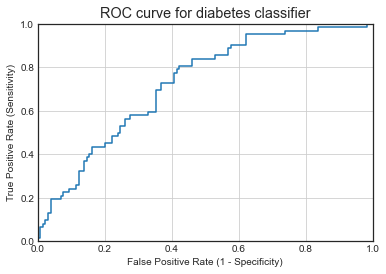

In [69]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [70]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [71]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [72]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


In [73]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_proba[:,1]))

0.7227047146401985


### Try it again : Question 5
1. Add more features into X. Print the accuracy and confusion matrix. Did you get better accuracy?
2. Plot the ROC curve. Comment on the results. 

source: [1] www.ritchieng.com/machine-learning-evaluate-classification-model

Marking : Each question 1-4 (1 mark), 5 (2 mark)

In [74]:
#Q1
#add 'glucose','bp'
# define X and y
feature_cols = ['num_preg','insulin', 'bmi', 'age','glucose','bp']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.label

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_test)
print('accuracy=',metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_pred_class,y_test))

#get better accuracy

accuracy= 0.796875
[[118  27]
 [ 12  35]]


0.8495037220843673


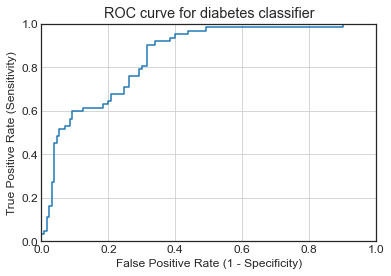

In [75]:
#Q2
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#New model's AUC is better than original model's AUS.
#The new model is better.

print(metrics.roc_auc_score(y_test, y_pred_proba[:,1]))